In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'



In [17]:
df = pd.read_csv(r"C:\Users\Seema.Sd\OneDrive\Desktop\intern task\Customer-Churn-Prediction-main\Datasets\telecom_customer_churn.csv")

In [19]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [20]:
df.shape

(7043, 38)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [22]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
5%,21.000000,0.000000,90241.100000,32.886925,-122.975500,0.000000,1.000000,3.270000,4.000000,19.500000,49.650000,0.000000,0.000000,0.000000,78.452000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
90%,71.000000,2.000000,95834.800000,39.457388,-117.148184,7.000000,69.000000,45.030000,59.000000,102.450000,5973.690000,0.000000,10.000000,2099.432000,7642.806000
95%,75.000000,3.000000,96020.900000,40.497425,-116.873258,9.000000,72.000000,47.640000,71.000000,107.195000,6921.025000,18.149000,60.000000,2577.877000,8747.041000


In [23]:
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Gender',
 'Married',
 'Number of Dependents',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Customer Status',
 'Churn Category']

In [24]:
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['Age',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue']

In [27]:
df["Total Revenue"].value_counts()

Total Revenue
24.80      3
116.27     3
68.41      3
66.56      3
3386.40    2
          ..
976.70     1
300.65     1
3258.42    1
1713.52    1
3707.60    1
Name: count, Length: 6975, dtype: int64

In [28]:
churn = df.loc[df["Total Revenue"]==1]

In [29]:
not_churn = df.loc[df["Total Revenue"]==0]

In [30]:
not_churn["Total Charges"].value_counts().sort_values()

Series([], Name: count, dtype: int64)

In [31]:
not_churn["Tenure in Months"].value_counts().sort_values()

Series([], Name: count, dtype: int64)

In [32]:
churn["Number of Referrals"].value_counts().sort_values()

Series([], Name: count, dtype: int64)

In [33]:
not_churn["Monthly Charge"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    0.0
mean     NaN
std      NaN
min      NaN
5%       NaN
25%      NaN
50%      NaN
75%      NaN
90%      NaN
95%      NaN
99%      NaN
max      NaN
Name: Monthly Charge, dtype: float64

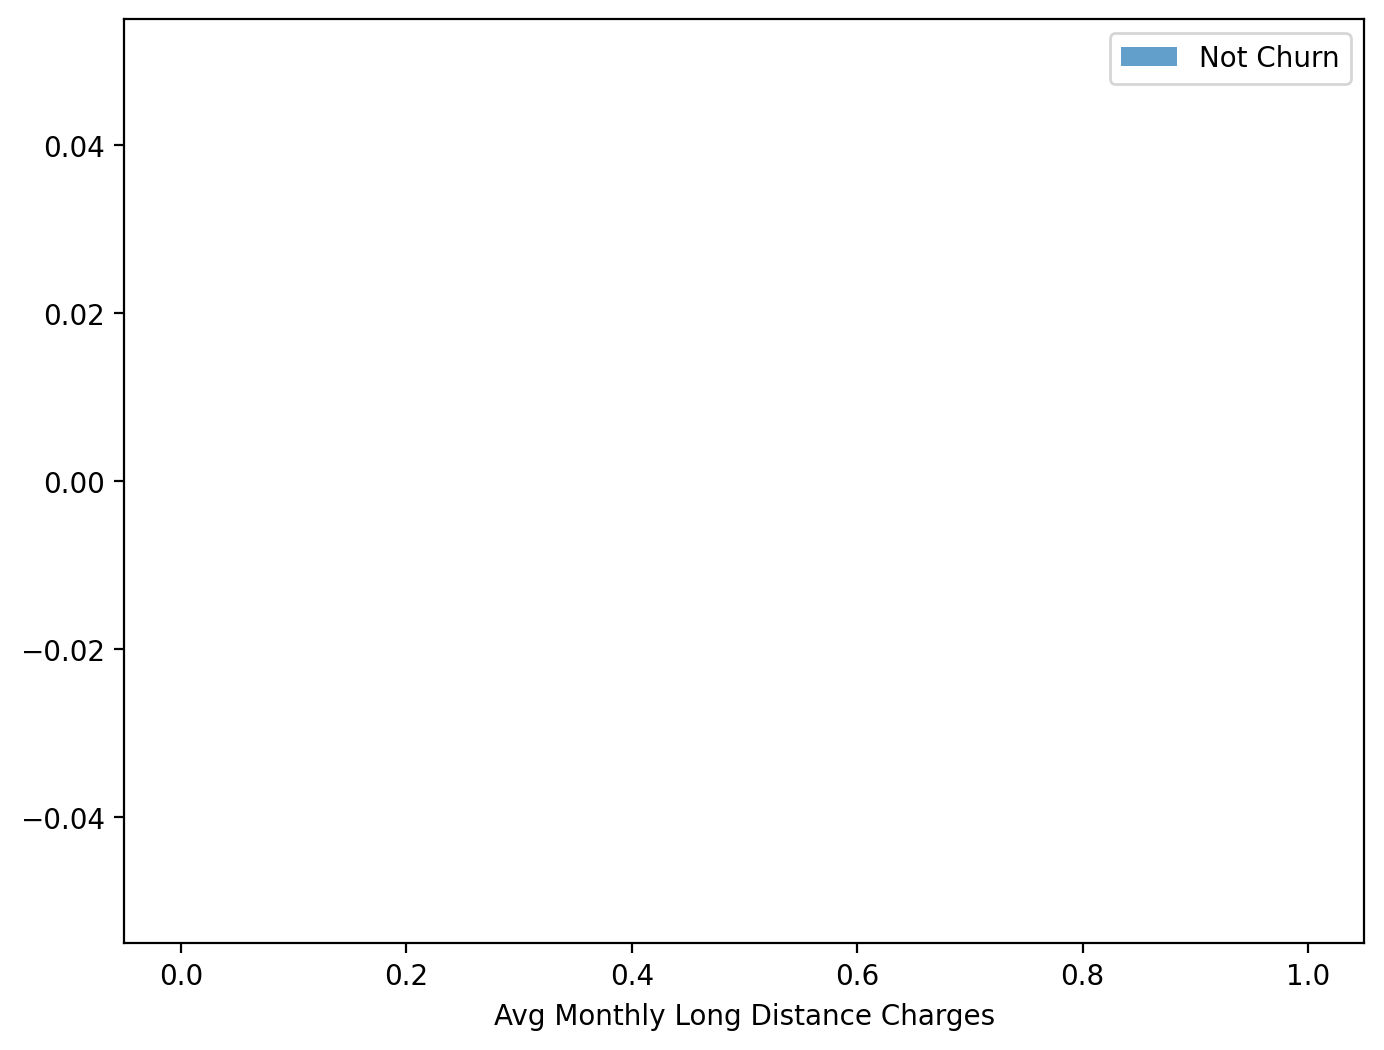

In [35]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Avg Monthly Long Distance Charges')
pyplot.hist(not_churn["Avg Monthly Long Distance Charges"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [36]:
churn["Total Long Distance Charges"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    0.0
mean     NaN
std      NaN
min      NaN
5%       NaN
25%      NaN
50%      NaN
75%      NaN
90%      NaN
95%      NaN
99%      NaN
max      NaN
Name: Total Long Distance Charges, dtype: float64

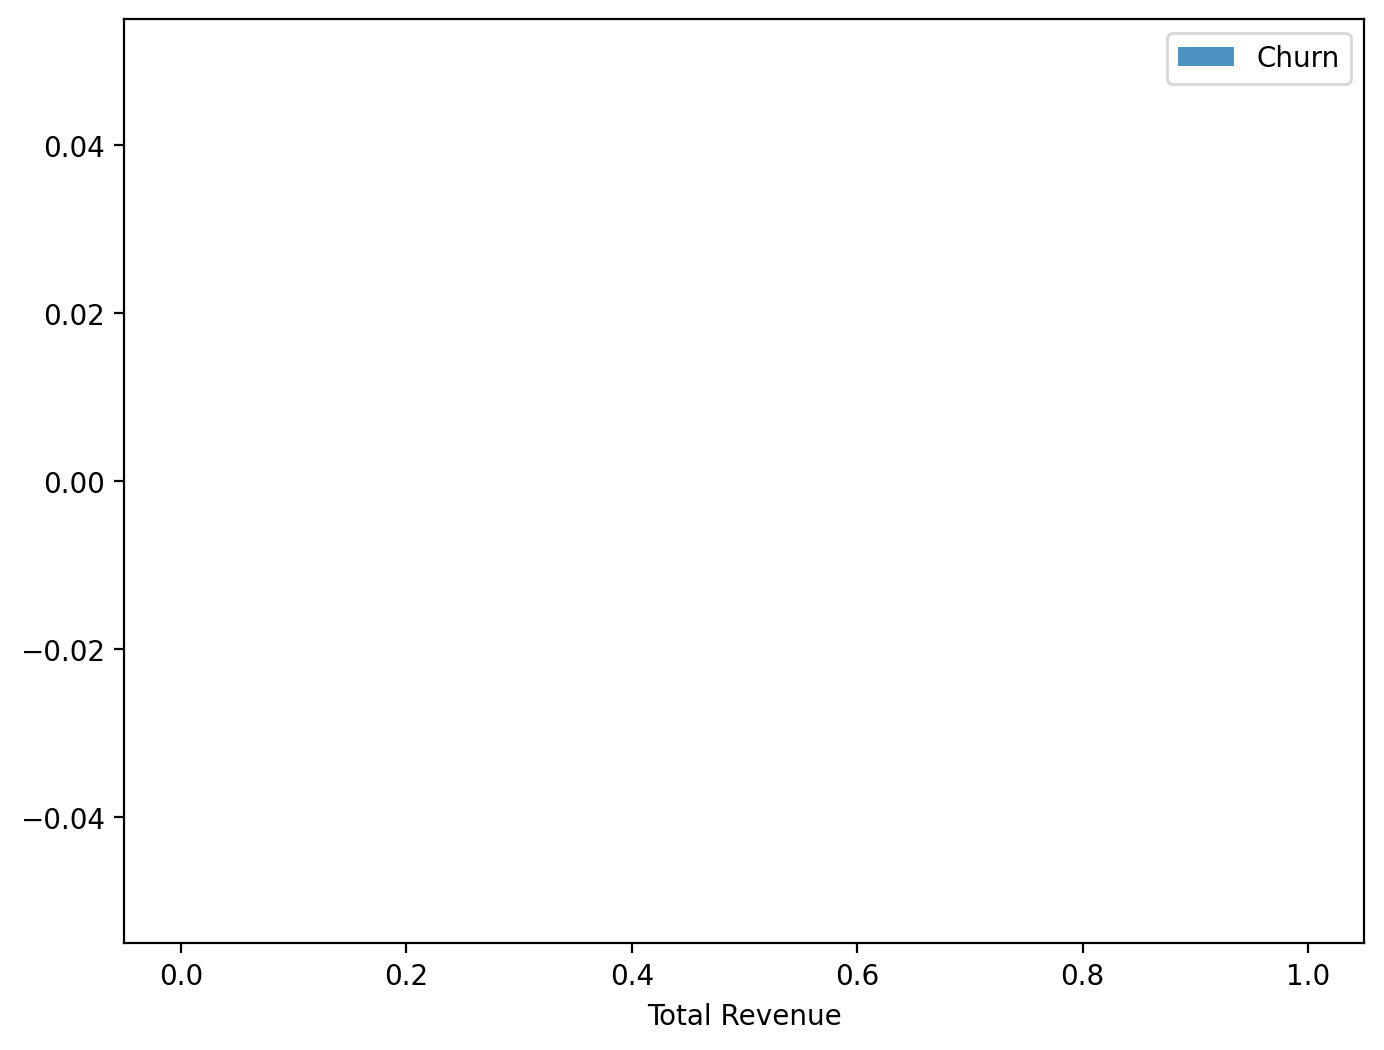

In [37]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total Revenue')
pyplot.hist(churn["Total Revenue"],bins=15, alpha=0.8, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [40]:
not_churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])


count    0.0
mean     NaN
std      NaN
min      NaN
5%       NaN
25%      NaN
50%      NaN
75%      NaN
90%      NaN
95%      NaN
99%      NaN
max      NaN
Name: Age, dtype: float64

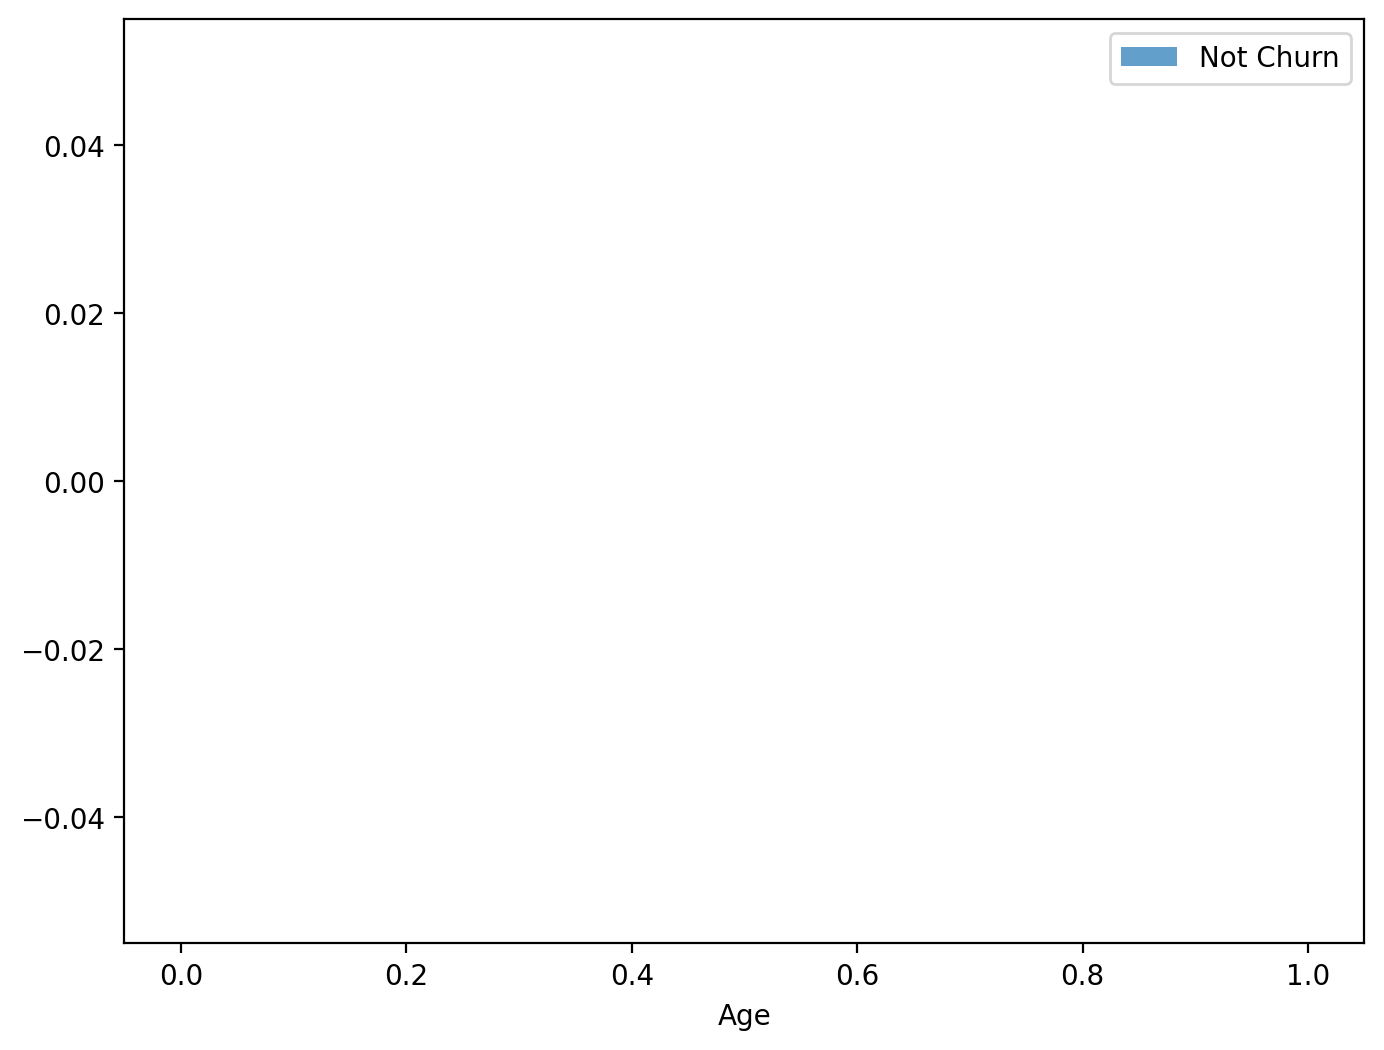

In [41]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(not_churn["Age"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [42]:
churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    0.0
mean     NaN
std      NaN
min      NaN
5%       NaN
25%      NaN
50%      NaN
75%      NaN
90%      NaN
95%      NaN
99%      NaN
max      NaN
Name: Age, dtype: float64

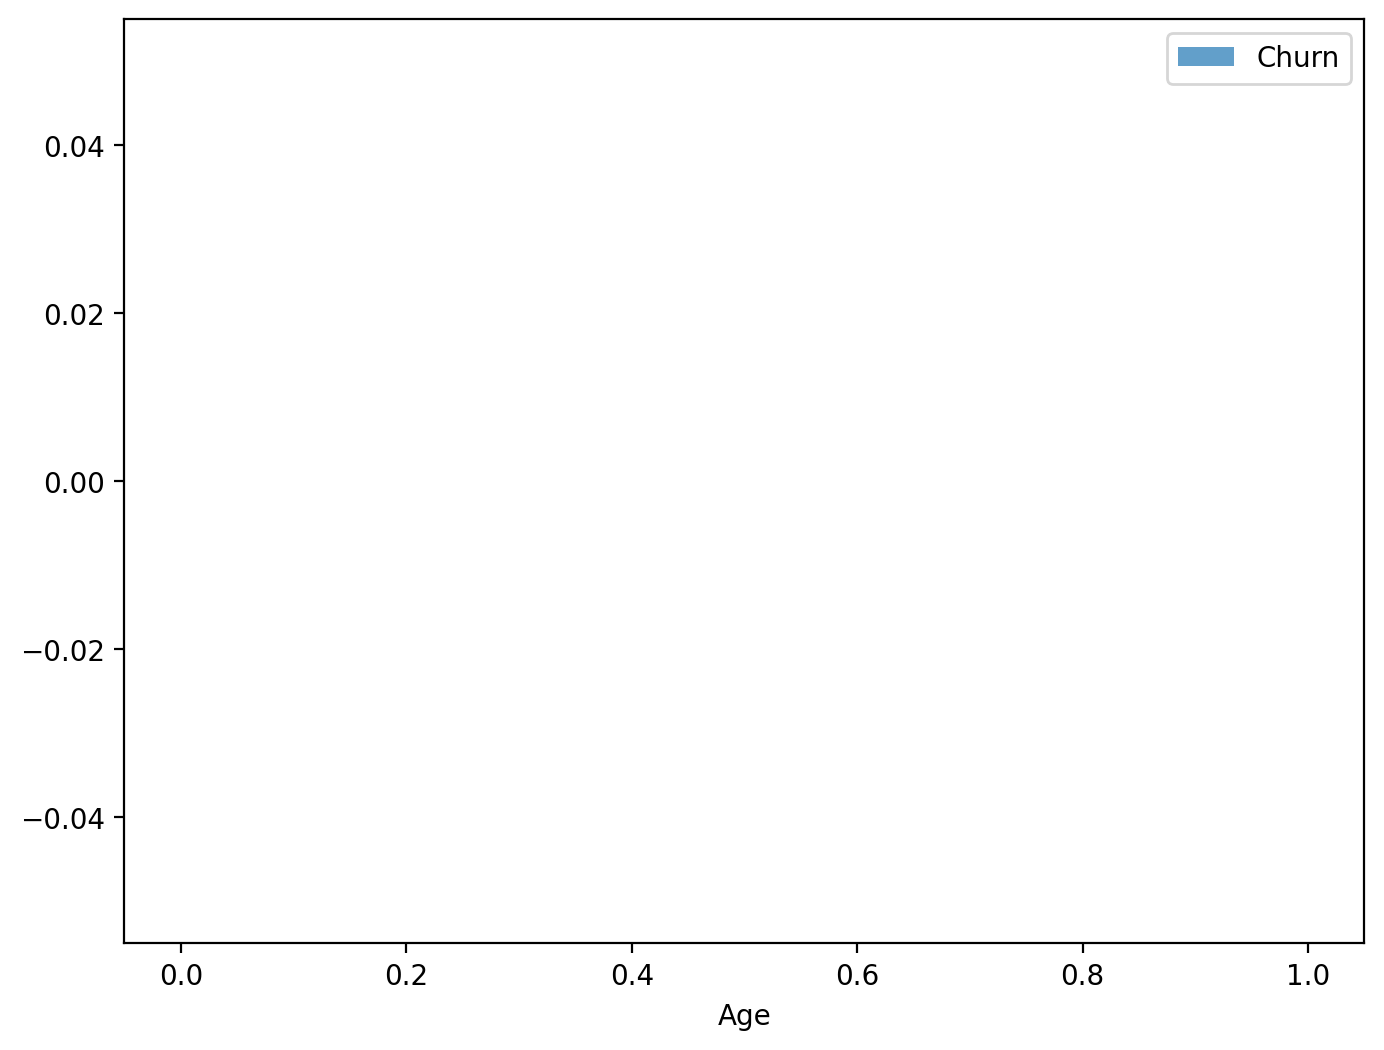

In [43]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(churn["Age"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

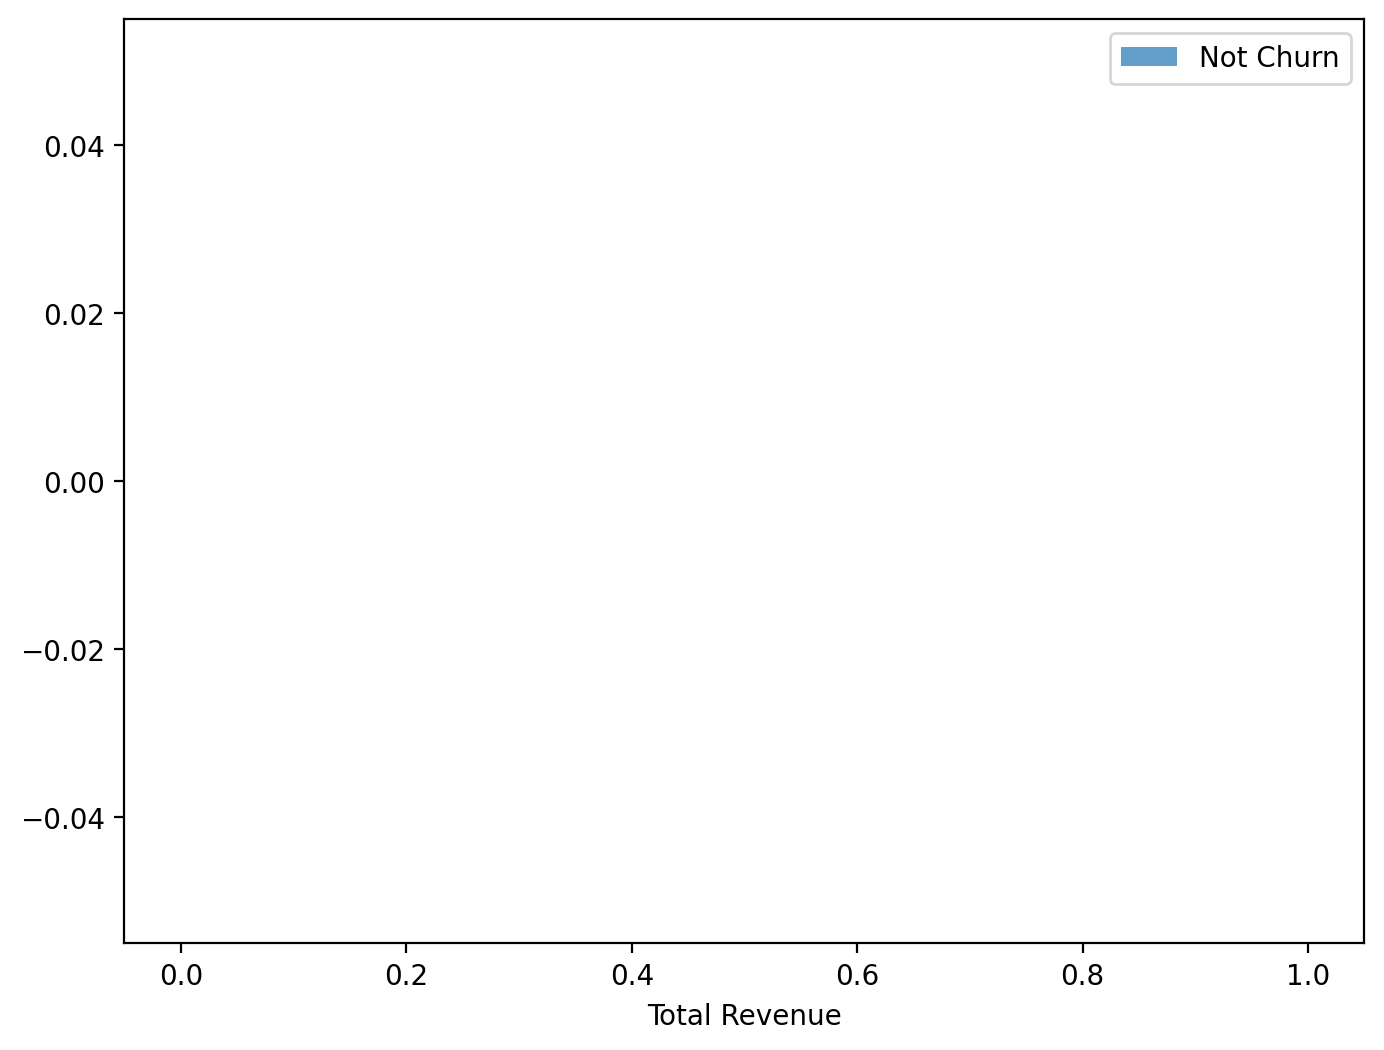

In [45]:
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total Revenue')
pyplot.hist(not_churn["Total Revenue"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()